<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Final Project// Monthly Income</font></h1>

<h1 align=center><font size = 6>How Much Do You Earn?</font></h1>

## Data Preparation

Load the library you need.

Get your Bank Census Datasets at kode.id.

In [190]:
# import package

import math
import statistics
import scipy.stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats.distributions as dist

import random
import warnings
import statsmodels.api as sm
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.preprocessing import LabelEncoder


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_digits

from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler, LabelEncoder

# import dataset
from sklearn.datasets import load_breast_cancer

# optional, untuk visualisasi decision tree
import sklearn.tree as tree
import pydotplus
from six import StringIO 
from IPython.display import Image
from sklearn import tree

from matplotlib.legend_handler import HandlerLine2D
import pandas_profiling
import pickle

from flask import Flask

In [191]:
# Load dataset

dataset = pd.read_csv("dataset/census.csv",na_values="?")
dataset.head()

age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [192]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [193]:
dataset.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64

Karena missing valuesnya terdapat pada kolom dengan tipe data object, maka kita replace dengan "`other`"

In [194]:
dataset.head()

age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-country income  
0              40  United-States  <=50K  
1              50  United-States  <=50K  
2              40  United-States   >50K  
3              40  United-States   >50K  
4              30  United-States  <=50K

In [195]:
df_census = dataset.fillna("other")

In [196]:
df_census.loc[df_census.workclass=='other',:].head(3)

age workclass  fnlwgt     education  education-num      marital-status  \
4    18     other  103497  Some-college             10       Never-married   
6    29     other  227026       HS-grad              9       Never-married   
13   58     other  299831       HS-grad              9  Married-civ-spouse   

   occupation relationship   race     sex  capital-gain  capital-loss  \
4       other    Own-child  White  Female             0             0   
6       other    Unmarried  Black    Male             0             0   
13      other      Husband  White    Male             0             0   

    hours-per-week native-country income  
4               30  United-States  <=50K  
6               40  United-States  <=50K  
13              35  United-States  <=50K

In [197]:
# let's check which columns should be categorical

print('Column name')
for col in df_census.columns:
    if df_census[col].dtype=='object':
        print(col, df_census[col].nunique())

Column name
workclass 9
education 16
marital-status 7
occupation 15
relationship 6
race 5
sex 2
native-country 42
income 2


In [198]:
print('Column name')
for col in df_census.columns:
    if df_census[col].dtype=='object':
        print([col])

Column name
['workclass']
['education']
['marital-status']
['occupation']
['relationship']
['race']
['sex']
['native-country']
['income']


In [199]:
# let's check which columns should be categorical

for col in df_census.columns:
    if df_census[col].dtype=='object':
        uni = {col : df_census[col].unique().tolist()}
        display(pd.DataFrame(uni))

        


workclass
0           Private
1         Local-gov
2             other
3  Self-emp-not-inc
4       Federal-gov
5         State-gov
6      Self-emp-inc
7       Without-pay
8      Never-worked

education
0           11th
1        HS-grad
2     Assoc-acdm
3   Some-college
4           10th
5    Prof-school
6        7th-8th
7      Bachelors
8        Masters
9      Doctorate
10       5th-6th
11     Assoc-voc
12           9th
13          12th
14       1st-4th
15     Preschool

marital-status
0          Never-married
1     Married-civ-spouse
2                Widowed
3               Divorced
4              Separated
5  Married-spouse-absent
6      Married-AF-spouse

occupation
0   Machine-op-inspct
1     Farming-fishing
2     Protective-serv
3               other
4       Other-service
5      Prof-specialty
6        Craft-repair
7        Adm-clerical
8     Exec-managerial
9        Tech-support
10              Sales
11    Priv-house-serv
12   Transport-moving
13  Handlers-cleaners
14       Armed-Forces

relationship
0       Own-child
1         Husband
2   Not-in-family
3       Unmarried
4            Wife
5  Other-relative

race
0               Black
1               White
2  Asian-Pac-Islander
3               Other
4  Amer-Indian-Eskimo

sex
0    Male
1  Female

native-country
0                United-States
1                        other
2                         Peru
3                    Guatemala
4                       Mexico
5           Dominican-Republic
6                      Ireland
7                      Germany
8                  Philippines
9                     Thailand
10                       Haiti
11                 El-Salvador
12                 Puerto-Rico
13                     Vietnam
14                       South
15                    Columbia
16                       Japan
17                       India
18                    Cambodia
19                      Poland
20                        Laos
21                     England
22                        Cuba
23                      Taiwan
24                       Italy
25                      Canada
26                    Portugal
27                       China
28                   Nicaragua
29                    Honduras
30                        Iran
31                    Scotland
32                     Jamaica
33                     Ecuador
34                  Yugoslavia
35                     Hungary
36                        Hong
37                      Greece
38             Trinadad&Tobago
39  Outlying-US(Guam-USVI-etc)
40                      France
41          Holand-Netherlands

income
0  <=50K
1   >50K

In [200]:
print('Column name :')
for col in df_census.columns:
    if df_census[col].dtype=='int64':
        print(col, df_census[col].nunique())

Column name :
age 74
fnlwgt 28523
education-num 16
capital-gain 123
capital-loss 99
hours-per-week 96


In [201]:
df_census.describe().loc[['min','mean','max']]

age        fnlwgt  education-num  capital-gain  capital-loss  \
min   17.000000  1.228500e+04       1.000000      0.000000      0.000000   
mean  38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
max   90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

      hours-per-week  
min         1.000000  
mean       40.422382  
max        99.000000

Data numerik memiliki informasi range sebagai berikut :
* umur = 17 - 90 tahun (rata-rata = 38 tahun)
* final weight = 12.285 - 1.490.400 (rata-rata = 189.664)
* level pendidikan = 1 - 16 (rata-rata = 10)
* capital gain = 0 - 99999 (rata-rata = 1.079)
* capital loss = 0 - 4356 (rata-rata = 87)
* jam kerja perminggu = 1 - 99 jam (rata-rata = 40 jam)

In [202]:
df_num = df_census.select_dtypes(include='number')
df_num.head(3)

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0   25  226802              7             0             0              40
1   38   89814              9             0             0              50
2   28  336951             12             0             0              40

In [203]:
df_obj =  df_census.select_dtypes(include='object')
df_obj.head(3)

workclass   education      marital-status         occupation relationship  \
0    Private        11th       Never-married  Machine-op-inspct    Own-child   
1    Private     HS-grad  Married-civ-spouse    Farming-fishing      Husband   
2  Local-gov  Assoc-acdm  Married-civ-spouse    Protective-serv      Husband   

    race   sex native-country income  
0  Black  Male  United-States  <=50K  
1  White  Male  United-States  <=50K  
2  White  Male  United-States   >50K

## Data Exploration

In [204]:
df_num.head()

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
0   25  226802              7             0             0              40
1   38   89814              9             0             0              50
2   28  336951             12             0             0              40
3   44  160323             10          7688             0              40
4   18  103497             10             0             0              30

Box Plot

Bagaimana distribusi data untuk fitur numerik?

In [205]:
df = df_num.drop(columns=['fnlwgt', 'capital-gain', 'capital-loss'])

In [206]:
columns = df.columns.values.tolist()
all_data = [np.array(df[column].T.tolist()) for column in columns]
all_data

[array([25, 38, 28, ..., 58, 22, 52]),
 array([ 7,  9, 12, ...,  9,  9,  9]),
 array([40, 50, 40, ..., 40, 20, 40])]

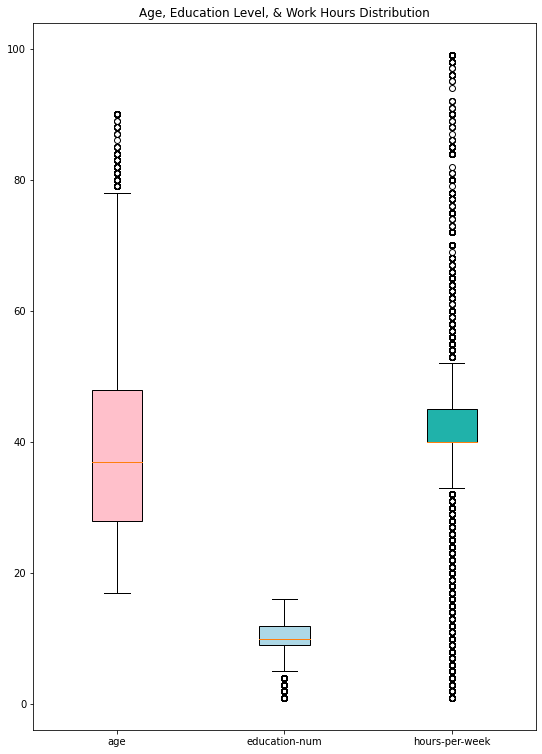

In [207]:
labels = ['age', 'education-num', 'hours-per-week']
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9, 13))


# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Age, Education Level, & Work Hours Distribution')


colors = ['pink', 'lightblue', 'lightseagreen']
for bplot in (bplot1):
    for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)


plt.show()


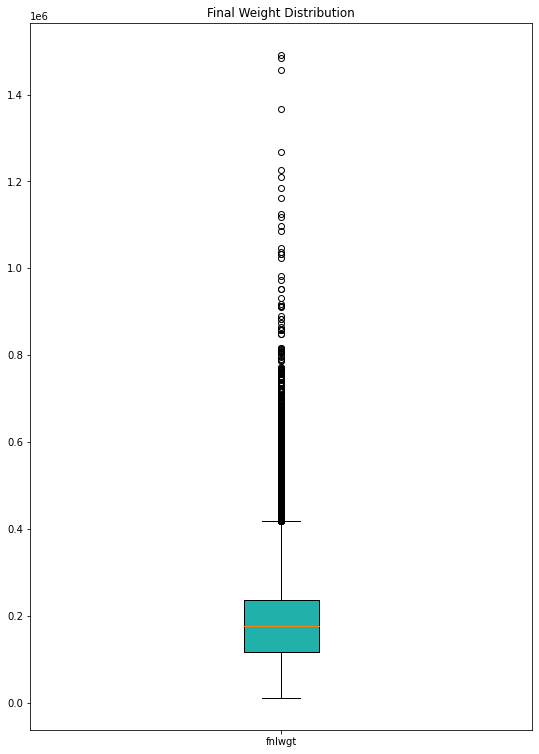

In [208]:
all_data = np.array(df_num['fnlwgt'].T.tolist())
labels = ['fnlwgt']
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(9, 13))


# rectangular box plot
bplot1 = ax1.boxplot(all_data,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Final Weight Distribution')


colors = ['lightseagreen']
for bplot in (bplot1):
    for patch, color in zip(bplot1['boxes'], colors):
        patch.set_facecolor(color)


plt.show()

In [209]:
report = df_census.profile_report(title = "report")
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [210]:
report.to_file("report.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Encode Data to String

In [211]:
df_obj.columns.tolist()

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [212]:
df_obj_2 = df_obj.copy()
encoding_classes = {}

le = LabelEncoder()
for col in df_obj.columns.tolist():
 df_obj_2[col] = le.fit_transform(df_obj[col].to_numpy())
 encoding_classes[col] = le.classes_

encoding_classes

{'workclass': array(['Federal-gov', 'Local-gov', 'Never-worked', 'Private',
        'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay',
        'other'], dtype=object),
 'education': array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
        'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
        'Masters', 'Preschool', 'Prof-school', 'Some-college'],
       dtype=object),
 'marital-status': array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object),
 'occupation': array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
        'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
        'Other-service', 'Priv-house-serv', 'Prof-specialty',
        'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving',
        'other'], dtype=object),
 'relationship': array(['Husband', 'Not-in-family', 'Other-relative', 'Ow

In [213]:
encoding_classes['native-country']

array(['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
       'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England',
       'France', 'Germany', 'Greece', 'Guatemala', 'Haiti',
       'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India',
       'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan', 'Laos', 'Mexico',
       'Nicaragua', 'Outlying-US(Guam-USVI-etc)', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Puerto-Rico', 'Scotland', 'South', 'Taiwan',
       'Thailand', 'Trinadad&Tobago', 'United-States', 'Vietnam',
       'Yugoslavia', 'other'], dtype=object)

In [214]:
# listing categorical data

# workclass = df_census['workclass'].to_numpy()
# education = df_census['education'].to_numpy()
# marital_status = df_census['marital-status'].to_numpy()
# occupation = df_census['occupation'].to_numpy()
# relationship = df_census['relationship'].to_numpy()
# race = df_census['race'].to_numpy()
# sex = df_census['sex'].to_numpy()
# native_country = df_census['native-country'].to_numpy()
# income = df_census['income'].to_numpy()


In [215]:
df_obj_en = df_census[['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income']]

In [216]:
df_obj_en2 = df_obj_en.copy()

In [217]:
le = LabelEncoder()
encoding_classes = {}

for col in df_obj_en2.columns :
    df_obj_en2[col] = le.fit_transform(df_obj_en[col])
    encoding_classes[col] = le.classes_

In [218]:
encoding_classes

{'workclass': array(['Federal-gov', 'Local-gov', 'Never-worked', 'Private',
        'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay',
        'other'], dtype=object),
 'education': array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
        'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
        'Masters', 'Preschool', 'Prof-school', 'Some-college'],
       dtype=object),
 'marital-status': array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object),
 'occupation': array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
        'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
        'Other-service', 'Priv-house-serv', 'Prof-specialty',
        'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving',
        'other'], dtype=object),
 'relationship': array(['Husband', 'Not-in-family', 'Other-relative', 'Ow

In [219]:
# le = LabelEncoder()
# workclass_en = le.fit_transform(workclass)
# print(le.classes_)

# le = LabelEncoder()
# education_en = le.fit_transform(education)
# print(le.classes_)

# le = LabelEncoder()
# marital_status_en = le.fit_transform(marital_status)
# print(le.classes_)

# le = LabelEncoder()
# occupation_en = le.fit_transform(occupation)
# print(le.classes_)
'''
le = LabelEncoder()
relationship_en = le.fit_transform(relationship)
print(le.classes_)

le = LabelEncoder()
race_en = le.fit_transform(race)
print(le.classes_)

le = LabelEncoder()
sex_en = le.fit_transform(sex)
print(le.classes_)

le = LabelEncoder()
native_country_en = le.fit_transform(native_country)
print(le.classes_)

le = LabelEncoder()
income_en = le.fit_transform(income)
print(le.classes_)

'''

'\nle = LabelEncoder()\nrelationship_en = le.fit_transform(relationship)\nprint(le.classes_)\n\nle = LabelEncoder()\nrace_en = le.fit_transform(race)\nprint(le.classes_)\n\nle = LabelEncoder()\nsex_en = le.fit_transform(sex)\nprint(le.classes_)\n\nle = LabelEncoder()\nnative_country_en = le.fit_transform(native_country)\nprint(le.classes_)\n\nle = LabelEncoder()\nincome_en = le.fit_transform(income)\nprint(le.classes_)\n\n'

In [220]:
'''
df_obj_en = pd.DataFrame({'workclass':workclass_en, 'education':education_en, 'marital-status':marital_status_en, 
                                'occupation':occupation_en,'relationship':relationship_en, 'race':race_en, 
                                'sex':sex_en, 'native-country':native_country_en, 'income':income_en})
df_obj_en
'''

"\ndf_obj_en = pd.DataFrame({'workclass':workclass_en, 'education':education_en, 'marital-status':marital_status_en, \n                                'occupation':occupation_en,'relationship':relationship_en, 'race':race_en, \n                                'sex':sex_en, 'native-country':native_country_en, 'income':income_en})\ndf_obj_en\n"

In [221]:
'''
df_num[['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income']] = df_obj_en[['workclass', 'education', 'marital-status', 
                                'occupation','relationship', 'race', 
                                'sex', 'native-country', 'income']]
df_census_en = df_num

df_census_en
'''

"\ndf_num[['workclass', 'education', 'marital-status', 'occupation',\n       'relationship', 'race', 'sex', 'native-country', 'income']] = df_obj_en[['workclass', 'education', 'marital-status', \n                                'occupation','relationship', 'race', \n                                'sex', 'native-country', 'income']]\ndf_census_en = df_num\n\ndf_census_en\n"

In [222]:
# df_obj_en.describe().loc[['min','max']]

## K-Nearest Neighbor

Membuat Model

In [223]:
# df_census_en.head()

In [224]:
df_num[['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income']] = df_obj_2[['workclass', 'education', 'marital-status', 
                                'occupation','relationship', 'race', 
                                'sex', 'native-country', 'income']]
df_census_en = df_num
df_census_en

age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0       25  226802              7             0             0              40   
1       38   89814              9             0             0              50   
2       28  336951             12             0             0              40   
3       44  160323             10          7688             0              40   
4       18  103497             10             0             0              30   
...    ...     ...            ...           ...           ...             ...   
48837   27  257302             12             0             0              38   
48838   40  154374              9             0             0              40   
48839   58  151910              9             0             0              40   
48840   22  201490              9             0             0              20   
48841   52  287927              9         15024             0              40   

       workclass  education  marital-status  occupation  relationship  race  \
0              3          1               4           6             3     2   
1              3         11               2           4             0     4   
2              1          7               2          10             0     4   
3              3         15               2           6             0     2   
4              8         15               4          14             3     4   
...          ...        ...             ...         ...           ...   ...   
48837          3          7               2          12             5     4   
48838          3         11               2           6             0     4   
48839          3         11               6           0             4     4   
48840          3         11               4           0             3     4   
48841          4         11               2           3             5     4   

       sex  native-country  income  
0        1              38       0  
1        1              38       0  
2        1              38       1  
3        1              38       1  
4        0              38       0  
...    ...             ...     ...  
48837    0              38       0  
48838    1              38       1  
48839    0              38       0  
48840    1              38       0  
48841    0              38       1  

[48842 rows x 15 columns]

In [225]:
# Target : income
# feature : !=income

features = df_census_en.drop(columns=["income"])
target = df_census_en["income"]

In [226]:
# maks neighbors (k) yang digunakan untuk memprediksi 
n = int((len(df_obj_en)-119)*0.0005)
n

24

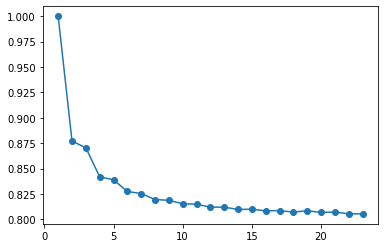

In [227]:
# k yang ditetapkan untuk membantu memprediksi akan dilihat yang paling akurat

i = range(1,n)

scores = []
for k in i:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(features, target)

    y_pred = model_knn.predict(features)

    scores.append(accuracy_score(target, y_pred))

plt.plot(i, scores, marker="o")

In [228]:
scores = pd.DataFrame(scores, columns=['scores'])
scores['k']=range(1,24)
display(scores)
scores['scores'].max()

scores   k
0   0.999898   1
1   0.877073   2
2   0.870501   3
3   0.841939   4
4   0.838950   5
5   0.827505   6
6   0.825478   7
7   0.819602   8
8   0.818803   9
9   0.815425  10
10  0.815036  11
11  0.812088  12
12  0.812088  13
13  0.809856  14
14  0.810061  15
15  0.808423  16
16  0.808730  17
17  0.807215  18
18  0.808546  19
19  0.806949  20
20  0.807174  21
21  0.805536  22
22  0.805434  23

0.9998976290897179

In [229]:
scores.loc[scores['scores']==scores['scores'].max()]

scores  k
0  0.999898  1

Terlihat pada grafik di atas bahwa semakin banyak k yang dipilih maka akurasi prediksi menurun. Akan diambil k=2 untuk model.

In [230]:
k=2

# buat modet
model_knn = KNeighborsClassifier(n_neighbors=k)

# latih model
model_knn.fit(features, target)

KNeighborsClassifier(n_neighbors=2)

Evaluasi Model

In [231]:
y_pred = model_knn.predict(features)
print(classification_report(target, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93     37155
           1       1.00      0.49      0.65     11687

    accuracy                           0.88     48842
   macro avg       0.93      0.74      0.79     48842
weighted avg       0.89      0.88      0.86     48842



Skor Akurasi Model =  0.8770730109332132


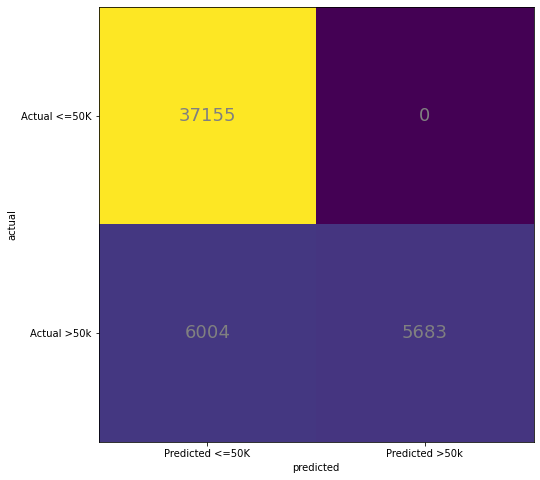

In [232]:
print("Skor Akurasi Model = ",accuracy_score(target, y_pred))

cm = confusion_matrix(target, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted <=50K', 'Predicted >50k'))
ax.set_xlabel("predicted")
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual <=50K', 'Actual >50k'))
ax.set_ylabel("actual")
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='grey', fontsize=18)
plt.show()

Keakuratan model `KNN` untuk case ini yang didapatkan dari confussion matriks adalah terdapat 37.155 data yang diprediksi `<=50K` benar, namun hanya terdapat 5.683 data yang diprediksi `>50k` benar. Hanya kita bisa melihat perbandingan antara prediksi benar dan salah pada masing-masing yes dan no. Yang benar diprediksi masih lebih besar akurasinya.

In [233]:
# save model dengan pickle
filename = 'KNN_income.pkl'
pickle.dump(model_knn, open(filename, 'wb'))

Prediksi dengan Model

In [234]:
'''
'age' = 35
'fnlwgt' = 180000
'education-num' = 10
'capital-gain' = 1000
'capital-loss' = 88
'hours-per-week' = 40 
'workclass' = 3
'education' = 10
'marital-status' = 3
'occupation' = 1
'relationship' = 2  
'race' = 2
'sex' = 1
'native-country' = 33 


client = [[35,180000,10,1000,88,40,3,10,3,1,2,2,1,33]]

predict = model_knn.predict(client)
print(predict)

>> [0]

'''

"\n'age' = 35\n'fnlwgt' = 180000\n'education-num' = 10\n'capital-gain' = 1000\n'capital-loss' = 88\n'hours-per-week' = 40 \n'workclass' = 3\n'education' = 10\n'marital-status' = 3\n'occupation' = 1\n'relationship' = 2  \n'race' = 2\n'sex' = 1\n'native-country' = 33 \n\n\nclient = [[35,180000,10,1000,88,40,3,10,3,1,2,2,1,33]]\n\npredict = model_knn.predict(client)\nprint(predict)\n\n>> [0]\n\n"

In [235]:
# model bisa memprediksi apabila kita input data
# 'age' 'fnlwgt' 'education-num' 'capital-gain' 'capital-loss' 'hours-per-week' 'workclass' 'education'
# 'marital-status' 'occupation' 'race' 'sex' 'native-country' 

age = 27
fnlwgt = 180000
edu_num = 10
cap_gain = 1000
cap_loss = 88
hpw = 40
work = np.where(encoding_classes['workclass'] == 'State-gov')[0][0]
edu = np.where(encoding_classes['education'] == 'Bachelors')[0][0]
marit = np.where(encoding_classes['marital-status'] == 'Married-civ-spouse')[0][0]
occ = np.where(encoding_classes['occupation'] == 'Tech-support' )[0][0]
rltsp = np.where(encoding_classes['relationship'] == 'Wife' )[0][0]
rc = np.where(encoding_classes['race'] == 'Asian-Pac-Islander' )[0][0]
sx = np.where(encoding_classes['sex'] == 'Female')[0][0]
native_ctry = np.where(encoding_classes['native-country'] == 'other')[0][0]

print(work, edu, marit, occ, rltsp, rc, sx, native_ctry)

model_knn.predict([[age, fnlwgt, edu_num, cap_gain, cap_loss, hpw, work, edu, marit, occ, rltsp, rc, sx, native_ctry]])

6 9 2 12 5 1 0 41


c:\Users\mindr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])